<a href="https://colab.research.google.com/github/EmadAliEmad/Image-Processing-/blob/main/Requirement_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage

# Download and organize dataset

In [ ]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)
!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

# Read Dataset

In [ ]:
dataset_dir = "data"
# Create a list of image directories
imgs_dir = os.listdir(dataset_dir)

# read the images
imgs = [io.imread(dataset_dir+"/"+dir) for dir in imgs_dir]

# Define a function that takes a list of images then samples 9 iamges from the list, then draws them using matplotlib in a 3x3 grid

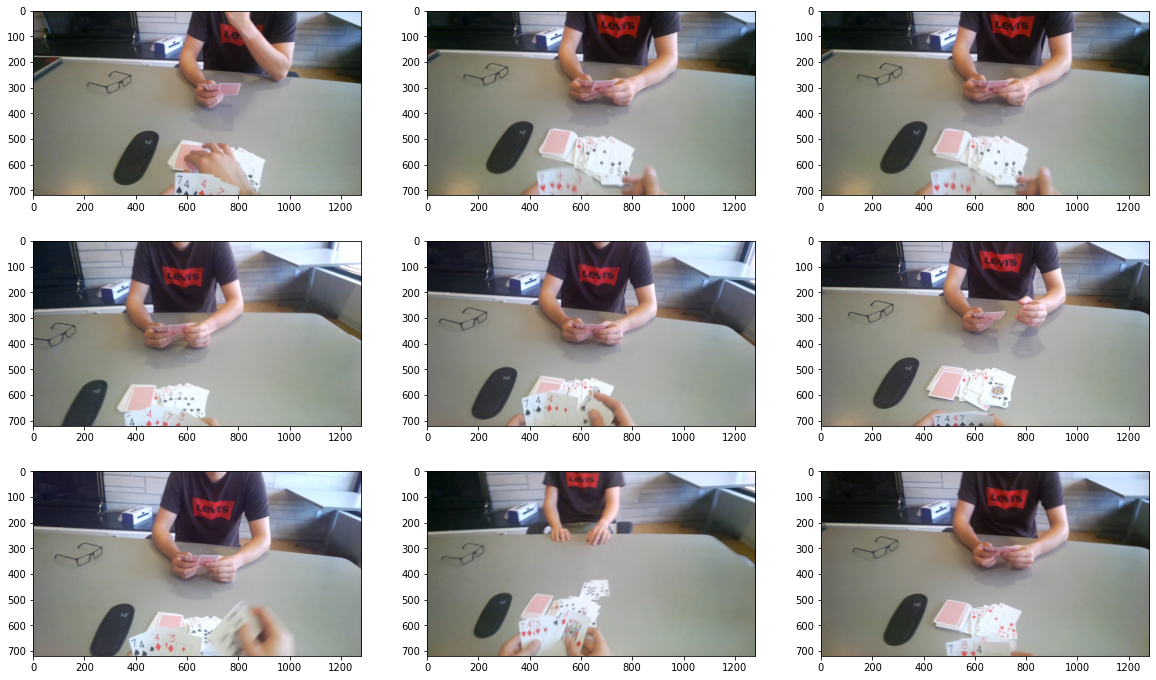

In [ ]:
import random # u may need this library
random.seed(100)

def draw_func(list_of_imgs):
  fig, axs = plt.subplots(3, 3,figsize=(20, 12))

  for ax in axs.flatten():
    ax.imshow(list_of_imgs[random.randint(0,len(list_of_imgs)-1)], cmap=plt.cm.gray)

  plt.show()

## Test your function using the read images here
draw_func(imgs)
##

# Apply Gray scaling on the images

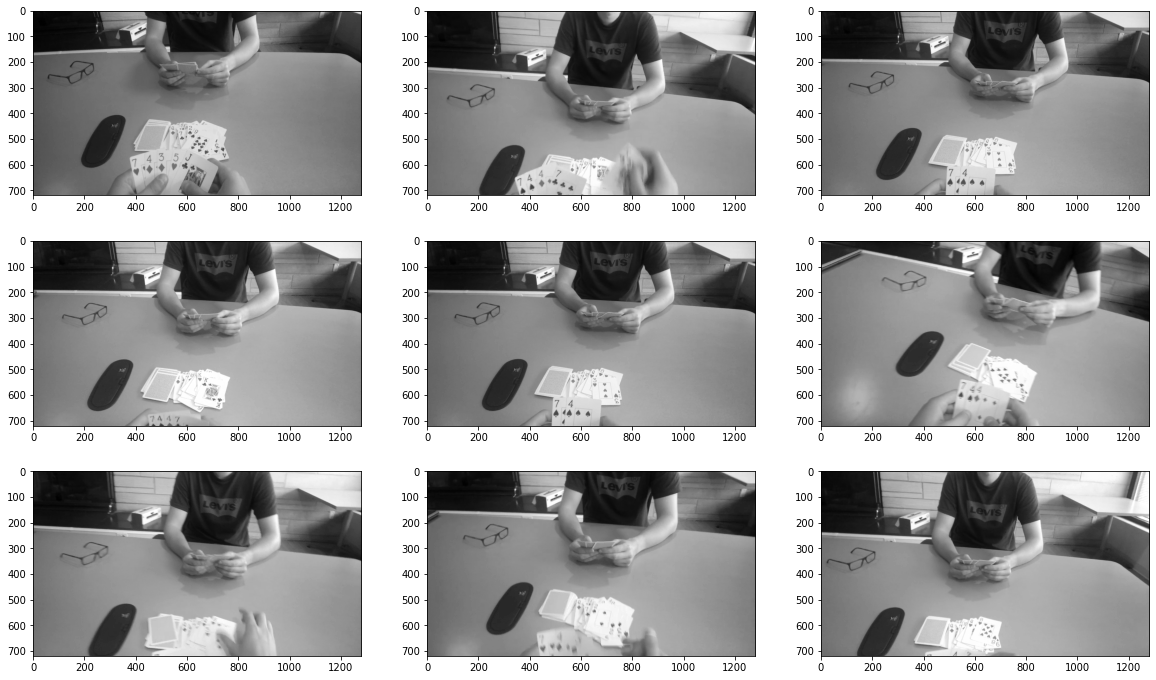

In [ ]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function

# Your code here
gray_scale_imgs = [skimage.color.rgb2gray(img) for img in imgs]
##

# Use your draw function to visualize the images
draw_func(gray_scale_imgs)



# Apply histogram equalization on the gray scale images

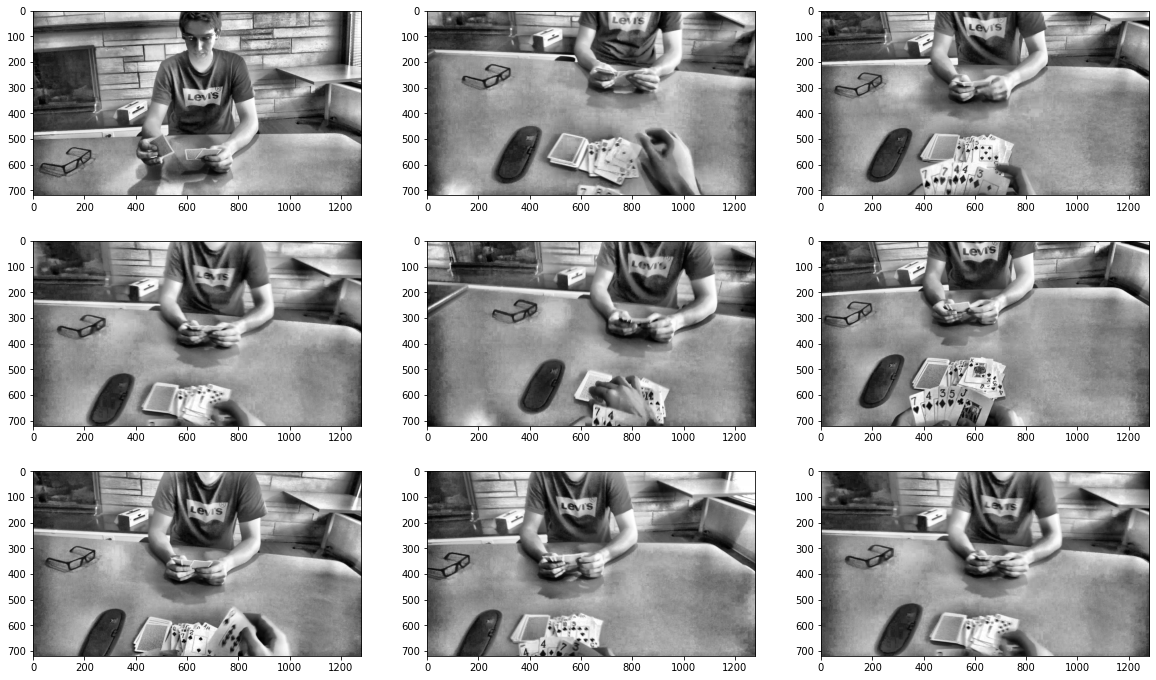

In [ ]:
from skimage import exposure # You will probably need this function
equ_imgs = [exposure.equalize_adapthist(img, clip_limit=0.03) for img in gray_scale_imgs]

# Use your draw function to visualize the images
draw_func(equ_imgs)

# Apply sobel edge detection on the equalized images

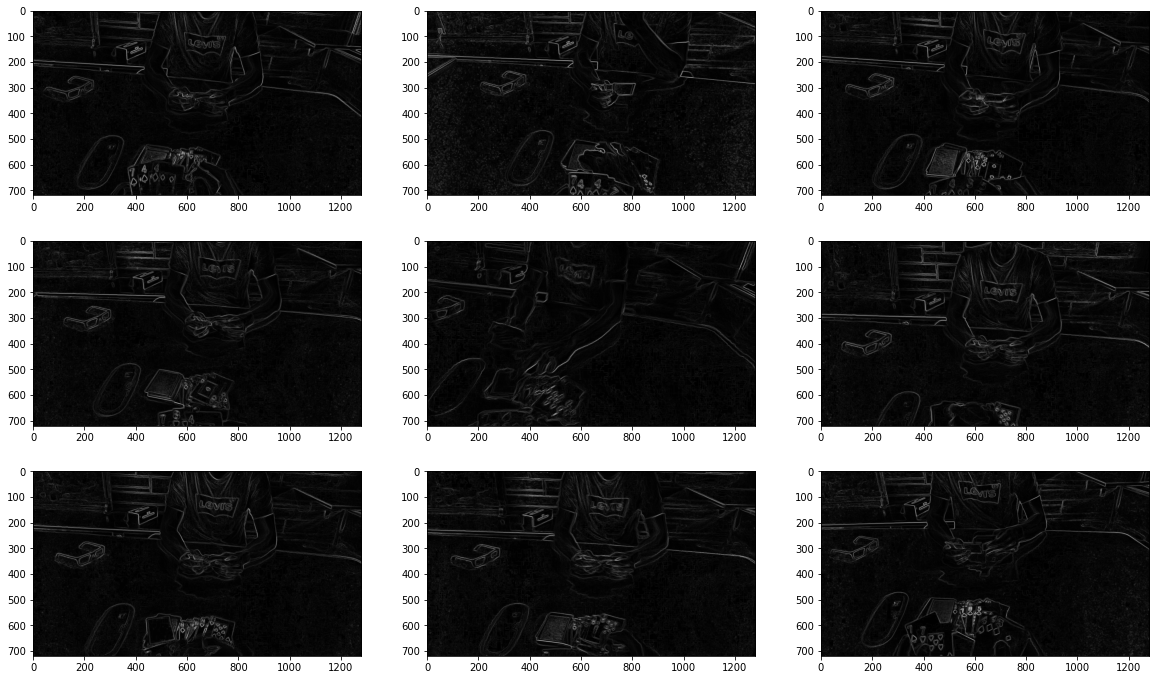

In [ ]:
from skimage.filters import sobel # You will probably need this function

# Your code here
sobel_imgs = [sobel(img) for img in equ_imgs]
##

# Use your draw function to visualize the images
draw_func(sobel_imgs)


# Apply Gaussian derivative over the equalized images

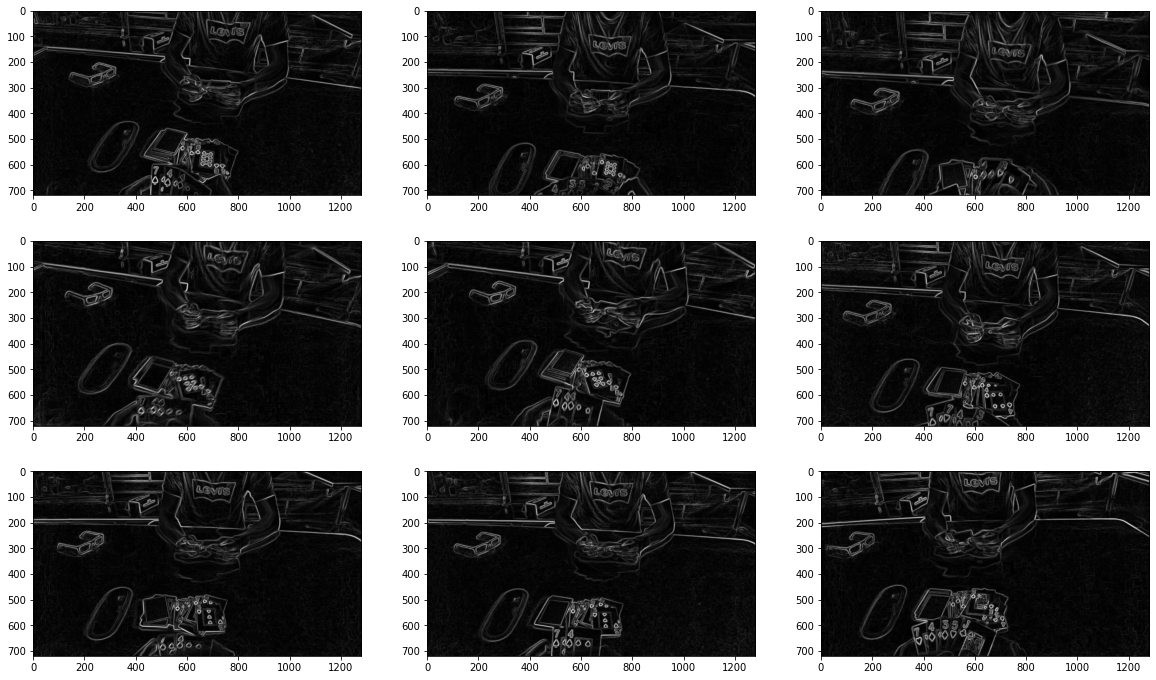

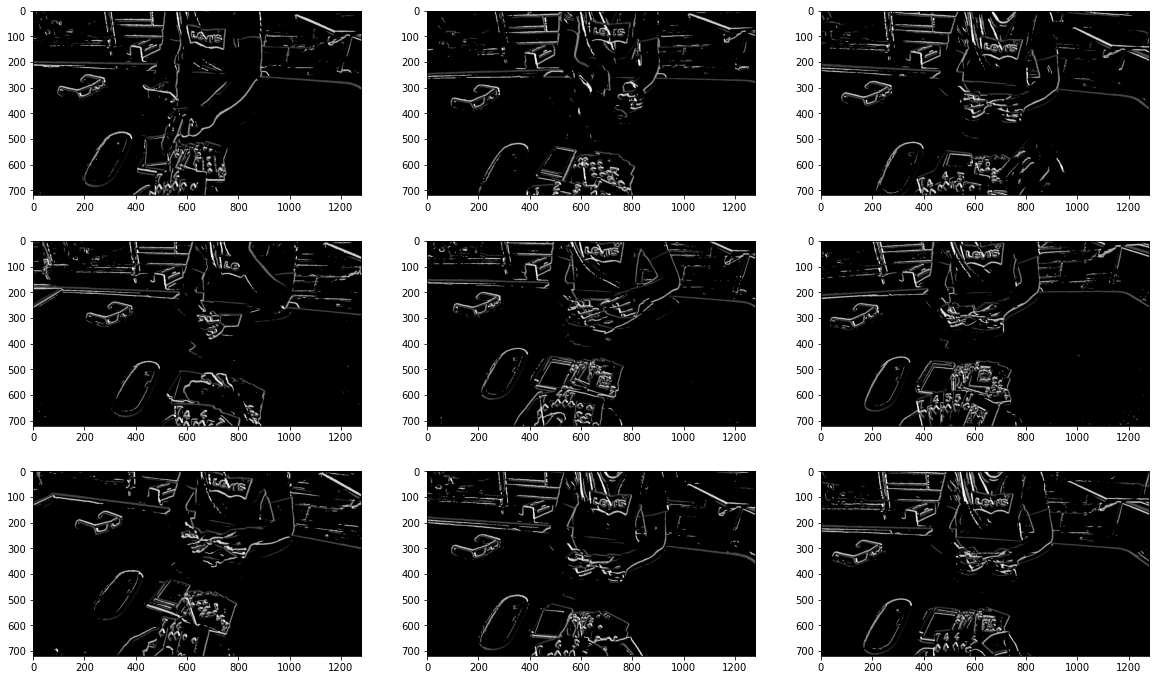

In [ ]:
import scipy.ndimage
import math

weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,))
weights[:,2] = np.ones((3,))
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,))
weights[2,:] = -np.ones((3,))
DoGy = scipy.ndimage.convolve(gaussF, weights)

devX = [scipy.ndimage.convolve(img, DoGx) for img in equ_imgs] # Derivative in the X direction
devY = [scipy.ndimage.convolve(img, DoGy) for img in equ_imgs] # Derivative in the Y direction

mag_imgs   = [np.sqrt(np.square(devx) + np.square(devy)) for devx, devy in zip(devX, devY)]
angle_imgs = [np.arctan2(-devy,devx) + math.pi           for devx, devy in zip(devX, devY)]

for angle, mag in zip(angle_imgs, mag_imgs):
  non_edge_indices = mag<0.18 # include only the edges with high gradients
  angle[non_edge_indices] = 0

# Use your draw function to visualize the magnitude
draw_func(mag_imgs)

# Use your draw function to visualize the orientation
draw_func(angle_imgs)

# Bonus: Search for super pixeling and apply it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


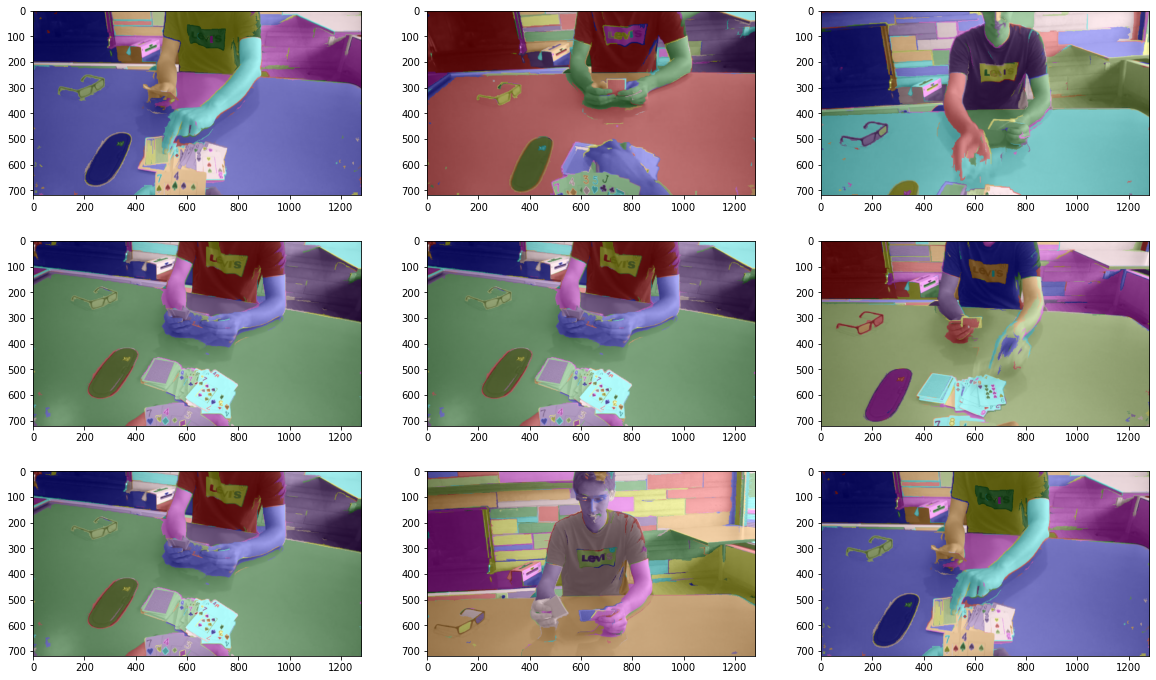

In [ ]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.color import label2rgb

# Your code here
segments = [felzenszwalb(img, scale=400, sigma=0.6, min_size=50) for img in imgs[:9]]
super_pixels = [label2rgb(segment, img) for img, segment in zip(imgs[:9], segments)]
##

# Use your draw function to visualize the results
draw_func(super_pixels)